# CH-4 


In [1]:
import sys
import sklearn
import numpy as np
import os
%matplotlib inline
np.random.seed=42 # to make this notebook's output stable across runs
import matplotlib as mpl
import matplotlib.pyplot as plt


mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#saving 
PROJECT_ROOT_DIR="."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path=os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## LINEAR REGRESSION:


first we'll look at the normal equation and how to perform linear regression from the scratch


Saving figure generated_data_plot


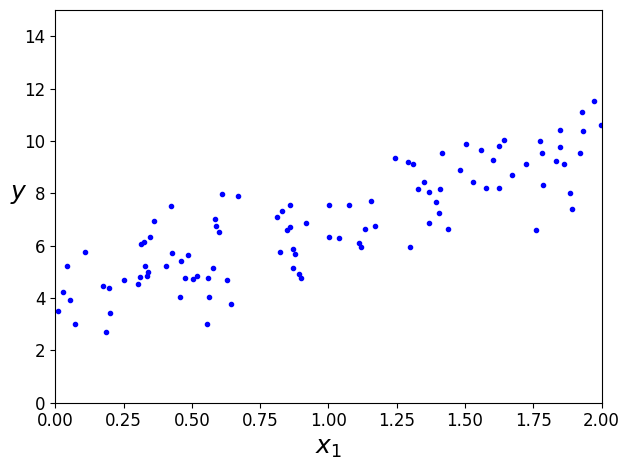

In [2]:
X=2*np.random.rand(100,1)
y=4+3*X +np.random.randn(100,1)

plt.plot(X,y,'b.')

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")


In [3]:
X_b=np.c_[np.ones((100,1)),X]   #adds x0=1 to each instance (np.c_ does 2D stacking along their last axis)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[4.08493457],
       [2.97876285]])

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.08493457],
       [10.04246027]])

Saving figure linear_model_predictions_plot


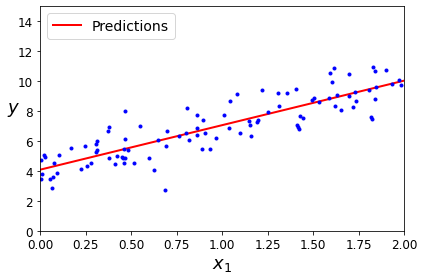

In [5]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

Now using `sklearn` to do the same thing

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.08493457]), array([[2.97876285]]))

In [7]:
lin_reg.predict(X_new)


array([[ 4.08493457],
       [10.04246027]])

`LinearRegression` is based on `scipy.linalg.lstsq()` (least squares) function.
The function below computes $\hat{\theta}={X^{+}}{y}$, where $X^+$ is the pseudoincverse of X.

We can also use `np.linalg.pinv()`

In [8]:
theta_best_svd, residuals, rank,s= np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

array([[4.08493457],
       [2.97876285]])

In [9]:
np.linalg.pinv(X_b).dot(y)

array([[4.08493457],
       [2.97876285]])

## GRADIENT DESCENT:

### Batch Gradient Descent

In [10]:
eta=0.1 #learning rate
n_iterations=1000
m=100

theta= np.random.randn(2,1)  #random initialisation using a normal distribution

for iteration in range(n_iterations):
    gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta=theta-eta*gradients

theta

array([[4.08493457],
       [2.97876285]])

In [11]:
X_new_b.dot(theta)

array([[ 4.08493457],
       [10.04246027]])

In [12]:
theta_path_bgd=[]

def plot_gradient_descent(theta,eta, theta_path=None):
    m=len(X_b)
    plt.plot(X,y,"b.")
    n_iterations=1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)


Saving figure gradient_descent_plot


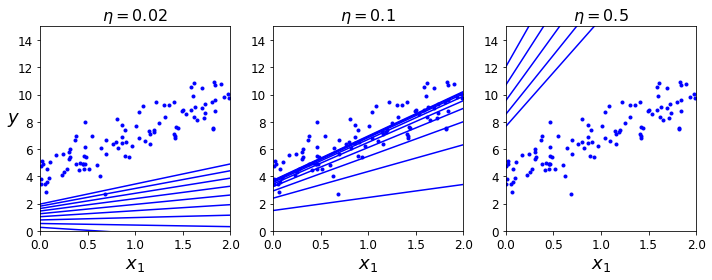

In [13]:
#np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

### Stochastic Gradient Descent: (also called SGD)

here, we'll see how stochastic gradient is able to achieve the same result even after being "RANDOM".

The code below basically does the following:
1. it iterates over a random instance at every step 
2. finds the gradients based on only that single gradient!

In [14]:
theta_path_sgd = []
m = len(X_b)

Saving figure sgd_plot


array([[4.10139419],
       [3.02405059]])

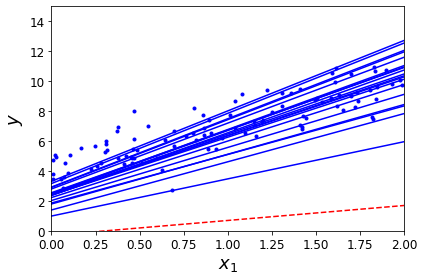

In [15]:
n_epochs=50
t0,t1=5,50  #learning schedule hyperparameters

def learning_schedule(t):   ####BASIC DEFINITION OF LEARNING SCHEDULE###
    return t0/(t+t1)

theta=np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):  #we defined earlier m=100

        #####PLOTTING IT:#############
        if epoch==0 and i<20:
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)
        #####################################

        random_index=np.random.randint(m)
        xi=X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch*m+i)
        theta=theta-eta*gradients
        theta_path_sgd.append(theta)
        
plt.plot(X,y,"b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.axis([0,2, 0,15])
save_fig("sgd_plot")
theta

In [16]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [17]:
sgd_reg.intercept_, sgd_reg.coef_


(array([4.10296011]), array([3.0067226]))

### Mini-Batch Gradient descent:


In [18]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

#np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization


t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)


t=0
for epoch in range(n_iterations):
    shuffled_indices=np.random.permutation(m)
    X_b_shuffled=X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta

array([[4.10453819],
       [3.01079724]])

In [19]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

In [20]:
theta_path_sgd

array([[[0.98583393],
        [2.48765248]],

       [[1.3914855 ],
        [3.22465647]],

       [[1.79176377],
        [3.32712223]],

       ...,

       [[4.10450122],
        [3.02749562]],

       [[4.1039121 ],
        [3.02696307]],

       [[4.10139419],
        [3.02405059]]])

Saving figure gradient_descent_paths_plot


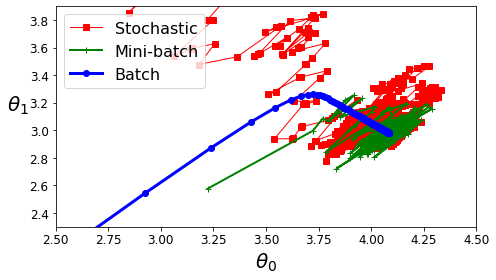

In [21]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

## POLYNOMIAL REGRESSION:

Text(0.5, 1.0, 'polynomial graph')

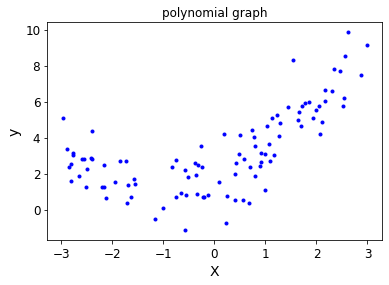

In [22]:
m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.title("polynomial graph")


A stright line will never fit this. So we do some "Pre-processing"

We basically contains the original X and it's square!

The X_poly that we created down, contains 2 features--> $X$ and $X^2$

In [23]:
from sklearn.preprocessing import PolynomialFeatures

poly_features=PolynomialFeatures(degree=2, include_bias=False) #we exclude any bias since we want it to be relatively simple now.
X_poly=poly_features.fit_transform(X)
print(X[0],X_poly[0])


[2.33901591] [2.33901591 5.47099542]


In [24]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([1.76142625]), array([[1.02242234, 0.50702126]]))

Here, it predicted:

$\hat{y}=0.4963x^2+1.04x+2.03$

whereas the original equation was:
$y=0.5x^2+1x+2+\text{Gaussian Noise}$


So not bad!!

Saving figure quadratic_predictions_plot


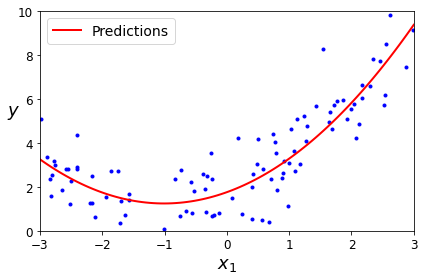

In [25]:
X_new=np.linspace(-3,3,100).reshape(100,1) #-3 to +3 is from the graph we made before this one.
X_new_poly=poly_features.transform(X_new)
y_new=lin_reg.predict(X_new_poly)
plt.plot(X,y,'b.')
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()



## LEARNING CURVES:

Saving figure Under-fitting Learning_curves plot


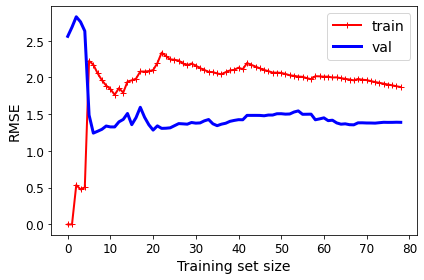

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val=train_test_split(X,y, test_size=0.2)
    train_errors=[]
    val_errors=[]
    for m in range(1, len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict=model.predict(X_train[:m])
        y_val_predict=model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors),"r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

plot_learning_curves(lin_reg, X,y)
save_fig("Under-fitting Learning_curves plot")

Now looking at the learning curve of a 10th degree polynomial.

Saving figure learning_curves_plot_polynomial regression


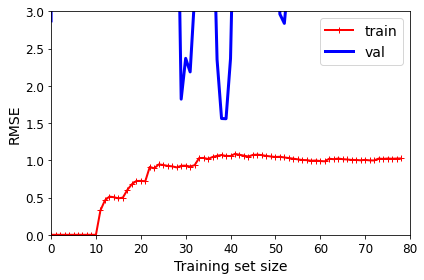

In [27]:
from sklearn.pipeline import Pipeline

polynomial_regression=Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])


plot_learning_curves(polynomial_regression, X,y)
plt.axis([0, 80, 0, 3])           
save_fig("learning_curves_plot_polynomial regression")  
plt.show()                        

## REGULARISED LINEAR MODELS:
A good way to reduce overfitting is to regularise the model.

### Ridge Regression:
Also called *Tikhonov regularisation*

It regularizes the linear regression using a term: $\alpha \sum_{i=1}^n \theta_i^2$. which is added to the cost function. It forces the model to not only fit the data but also to keep the model weights as small as possible.


Note, we 'll be using reshape so often because the random ad randn create a 1D array, and we need to model our linspace one like that!

In [28]:
m=20
X=3*np.random.rand(m,1)
y=1+0.5*X + np.random.randn(m,1)/1.5
X_new=np.linspace(0,3,100).reshape(100,1)

print(X_new, X, y)

[[0.        ]
 [0.03030303]
 [0.06060606]
 [0.09090909]
 [0.12121212]
 [0.15151515]
 [0.18181818]
 [0.21212121]
 [0.24242424]
 [0.27272727]
 [0.3030303 ]
 [0.33333333]
 [0.36363636]
 [0.39393939]
 [0.42424242]
 [0.45454545]
 [0.48484848]
 [0.51515152]
 [0.54545455]
 [0.57575758]
 [0.60606061]
 [0.63636364]
 [0.66666667]
 [0.6969697 ]
 [0.72727273]
 [0.75757576]
 [0.78787879]
 [0.81818182]
 [0.84848485]
 [0.87878788]
 [0.90909091]
 [0.93939394]
 [0.96969697]
 [1.        ]
 [1.03030303]
 [1.06060606]
 [1.09090909]
 [1.12121212]
 [1.15151515]
 [1.18181818]
 [1.21212121]
 [1.24242424]
 [1.27272727]
 [1.3030303 ]
 [1.33333333]
 [1.36363636]
 [1.39393939]
 [1.42424242]
 [1.45454545]
 [1.48484848]
 [1.51515152]
 [1.54545455]
 [1.57575758]
 [1.60606061]
 [1.63636364]
 [1.66666667]
 [1.6969697 ]
 [1.72727273]
 [1.75757576]
 [1.78787879]
 [1.81818182]
 [1.84848485]
 [1.87878788]
 [1.90909091]
 [1.93939394]
 [1.96969697]
 [2.        ]
 [2.03030303]
 [2.06060606]
 [2.09090909]
 [2.12121212]
 [2.15

Basic Ridge regression:

In [29]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.6681534]])

In [30]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.66702897]])

Saving figure ridge_regression_plot


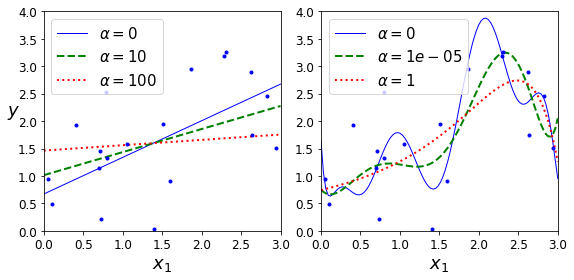

In [31]:
from sklearn.preprocessing import StandardScaler
def plot_model(model_class,polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model=model_class(alpha,**model_kargs) if alpha>0 else LinearRegression()
        if polynomial:
            model=Pipeline([
            ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
            ("std_scaler", StandardScaler()),
            ("regul_reg", model)
            ])
        model.fit(X,y)
        y_new_regul=model.predict(X_new)
        lw=2 if alpha>0 else 1 ##line width
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))  #formatting adds it to the brackets position.
    plt.plot(X,y,"b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("ridge_regression_plot")
plt.show()


Doing the same using a SGD regressor:


In [32]:
sgd_reg=SGDRegressor(penalty="l2")  #euclidean norm (for the Weights afaik)--> sets the type of regularisation to use.
sgd_reg.fit(X,y.ravel())   #.ravel() flattens an array
sgd_reg.predict([[1.5]])

array([1.61974455])

### Lasso regression:

In [33]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])


array([1.65921076])

implementing the same using the SGD vector

In [34]:
sgd_reg=SGDRegressor(penalty="l1")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([1.62037794])

c:\Users\Anushtup Nandy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.851e+00, tolerance: 2.217e-03
  model = cd_fast.enet_coordinate_descent(


Saving figure lasso_regression_plot


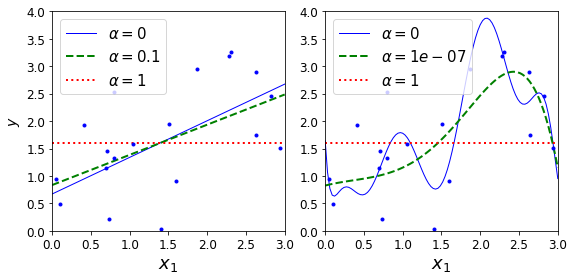

In [35]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False,alphas=(0,0.1,1), random_state=42)
plt.ylabel("$y$")
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0,10**-7,1), random_state=42)

save_fig("lasso_regression_plot")
plt.show()


### Elastic net:

It's the middle gorund between ridge and Lasso

In [36]:
from sklearn.linear_model import ElasticNet

elastic_net=ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([1.66198467])

### Early Stopping:

In [37]:
m=100
X=np.random.rand(m,1)
y=2+ X + 0.5 * X**2 + np.random.randn(m, 1)
X_train,X_val,y_train, y_val=train_test_split(X[:50],y[:50].ravel(), test_size=0.5, random_state=10)


In the slide before we created another set of X and y (whererin X is an ndarray from a random distribution, and y is an ndarray from a *normal distribution*)
Then we split it into train and test sections and reduced it's size to 1/2 (test_size hyperparameter)

In [38]:
from sklearn.base import clone

##preparing the data:
poly_scaler=Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled=poly_scaler.fit_transform(X_train)
X_val_poly_scaled=poly_scaler.fit_transform(X_val)

## training a sgd regressor

sgd_reg=SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)
minimum_val_error=float("inf")
best_epoch=None
best_model=None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)   #continues where it left off
    y_val_predict=sgd_reg.predict(X_val_poly_scaled)
    val_error=mean_squared_error(y_val, y_val_predict)
    if val_error< minimum_val_error:
        minimum_val_error=val_error
        best_epoch=epoch
        best_model=clone(sgd_reg)



Creating the graph:


Saving figure early_stopping_plot


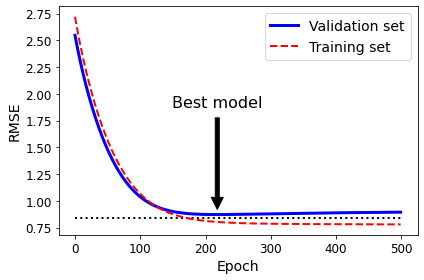

In [39]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
save_fig("early_stopping_plot")
plt.show()

In [40]:
best_epoch, best_model

(218,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

## LOGISTIC REGRESSION:

We'll detect the iris virginica based on only the *petal width feature*

In [41]:
from sklearn import datasets
iris=datasets.load_iris()

list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [42]:
import pandas as pd

iris_df=pd.DataFrame(iris["data"], columns=iris["feature_names"])
iris_df["target"]=iris["target"]

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [43]:
list(iris.values())

[array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [44]:
print(iris.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

We can see a few things here...
the "data" has a 4 colums wherein the 3rd one is petal width--> our feature
and we need the target "iris virginica" (just because)

In [45]:
X=iris["data"][:,3:]   # petal width
y=(iris["target"]==2).astype(np.int) #1 if virginica or 0

C:\Users\Anushtup Nandy\AppData\Local\Temp\ipykernel_9260\609765043.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y=(iris["target"]==2).astype(np.int) #1 if virginica or 0


Making a Logistic regression model below:

In [46]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

c:\Users\Anushtup Nandy\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\patches.py:1450: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.verts = np.dot(coords, M) + [


Saving figure logistic_regression_plot


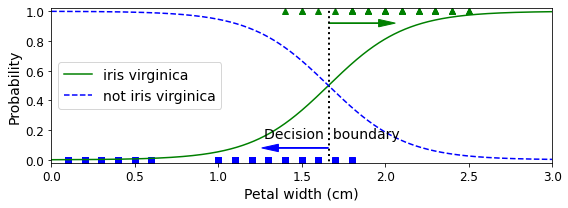

In [47]:
X_new=np.linspace(0,3,1000).reshape(-1,1)  #makes the array into a 1D array
y_proba=log_reg.predict_proba(X_new)
decision_boundary=X_new[y_proba[:, 1]>=0.5][0]   #1st one 

plt.figure(figsize=(8,3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")

plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)

plt.plot(X_new, y_proba[:, 1], "g-", label="iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="not iris virginica")


plt.legend(loc="center left")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
save_fig("logistic_regression_plot")



plt.show()


In [48]:
decision_boundary

array([1.66066066])

The iris virginica petal widths are usually from 1.4-2.5cm (shown by the green triangles)

In [49]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

### Softmax regression:

Specifying "multinomial" and solver: "lbfgs" switches the logistic regression to a Softmax regression.

In [50]:
X_soft=iris["data"][:,(2,3)]  #petal length, petal width
y_soft=(iris["target"]==2).astype(np.int)

log_reg_soft=LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)  
log_reg_soft.fit(X_soft,y_soft)




C:\Users\Anushtup Nandy\AppData\Local\Temp\ipykernel_9260\3855878924.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_soft=(iris["target"]==2).astype(np.int)


LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [51]:
log_reg_soft.predict([[5,2]])


array([1])

In [52]:
log_reg_soft.predict_proba([[5,2]])

array([[0.04659024, 0.95340976]])

####  Now, we'll just demonstrate the graph that fully showcases the iris dataset:

C:\Users\Anushtup Nandy\AppData\Local\Temp\ipykernel_9260\2034754404.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_2 = (iris["target"] == 2).astype(np.int)


Saving figure logistic_regression_contour_plot


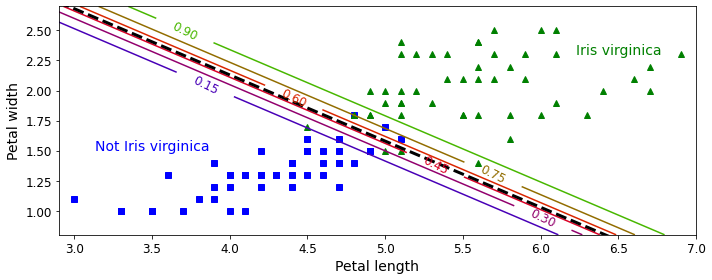

In [53]:
from sklearn.linear_model import LogisticRegression

X_2 = iris["data"][:, (2, 3)]  # petal length, petal width
y_2 = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X_2, y_2)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new_2 = np.c_[x0.ravel(), x1.ravel()]

y_proba_2 = log_reg.predict_proba(X_new_2)

plt.figure(figsize=(10, 4))
plt.plot(X_2[y_2==0, 0], X_2[y_2==0, 1], "bs")
plt.plot(X_2[y_2==1, 0], X_2[y_2==1, 1], "g^")

zz = y_proba_2[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
save_fig("logistic_regression_contour_plot")
plt.show()

same graph but for softmax:

Saving figure softmax_regression_contour_plot


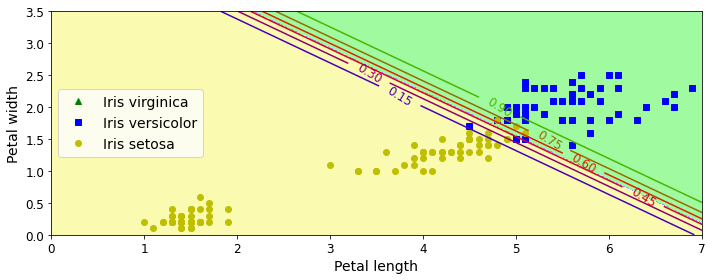

In [54]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new_3 = np.c_[x0.ravel(), x1.ravel()]


y_proba_3 = log_reg_soft.predict_proba(X_new_3)
y_predict_3 = log_reg_soft.predict(X_new_3)

zz1 = y_proba_3[:, 1].reshape(x0.shape)
zz = y_predict_3.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X_2[y_2==2, 0], X_2[y_2==2, 1], "g^", label="Iris virginica")
plt.plot(X_2[y_2==1, 0], X_2[y_2==1, 1], "bs", label="Iris versicolor")
plt.plot(X_2[y_2==0, 0], X_2[y_2==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
save_fig("softmax_regression_contour_plot")
plt.show()

## Question-12

Implementing the softmax coding without any sort of sklearn help!

In [56]:
X_12=iris["data"][:,(2,3)]
y_12=iris["target"]

X_12_with_bias=np.c_[np.ones([len(X_12),1]),X_12] #we need to add the bias term or 1 check out (https://stats.stackexchange.com/questions/298977/why-is-softmax-regression-often-written-without-the-bias-term)

#np.random.seed(2042)

In [58]:
test_ratio=0.2
validation_ratio=0.2
total_size=len(X_12_with_bias)

test_size=int(total_size*test_ratio)
validation_size=int(total_size*validation_ratio)
training_size=total_size-test_size-validation_size

X_12_train=X_12_with_bias[np.random.permutation(total_size)[:training_size]]
X_12_val=X_12_with_bias[np.random.permutation(total_size)[training_size:-test_size]]

y_12_train=y_12[np.random.permutation(total_size)[:training_size]]
y_12_val=y_12[np.random.permutation(total_size)[training_size:-test_size]]

X_12_test=X_12_with_bias[np.random.permutation(total_size)[-test_size:]]
y_12_test=y_12[np.random.permutation(total_size)[-test_size:]]

In [59]:
y_12

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

We can see that the target classes are of 3 types 0,1 and 2. 

But we need to make it into a probability which ranges from 0-1. 0 for all values except the wanted one.

In [66]:
def one_hot(y):
    n_class=y.max()+1  # 2+1=3
    m=len(y)
    Y_one_hot=np.zeros((m,n_class))
    Y_one_hot[np.arange(m),y]=1
    return Y_one_hot

In [68]:
y_12_train[:10]

array([0, 2, 0, 1, 2, 2, 2, 2, 0, 0])

In [70]:
one_hot(y_12_train[:10])

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [75]:
Y_12_train_one_hot=one_hot(y_12_train)

Y_12_valid_one_hot=one_hot(y_12_val)

Y_12_test_one_hot=one_hot(y_12_test)

In [77]:
def softmax(logit):
    exps=np.exp(logit)
    exp_sum=np.sum(exps,axis=1, keepdims=True)
    return exps/exp_sum

In [84]:
n_inputs=X_12_train.shape[1] #==3 (2 features and the bias term)

n_outputs=len(np.unique(y_12_train))  #==3 (3 iris classes)


Now we train the model:

In [87]:
eta=0.01 #learning rate
n_iter=5001
m=len(X_12_train)
e=1e-7 #we add this to Y_proba since log doesn't work with 0.

Theta_12=np.random.randn(n_inputs, n_outputs)

for i in range(n_iter):
    logits=X_12_train.dot(Theta_12)
    Y_12_proba=softmax(logits)
    if i%500==0:
        loss=-np.mean(np.sum(Y_12_train_one_hot*np.log(Y_12_proba+e), axis=1))
        print(i,loss)
    error=Y_12_proba-Y_12_train_one_hot
    gradients=1/m*X_12_train.T.dot(error)
    Theta_12=Theta_12-eta*gradients

    


0 4.437616668148097
500 1.0854582852851533
1000 1.08276340857559
1500 1.0811325728853796
2000 1.0801159285480417
2500 1.0794529771273655
3000 1.0789958209303174
3500 1.0786613366866404
4000 1.078402857573339
4500 1.0781939657978066
5000 1.0780194209921574


In [88]:
Theta_12

array([[ 0.19713321,  0.1001825 ,  0.34877607],
       [ 0.12705005,  0.24936665,  0.57128611],
       [ 0.01103122, -0.1790976 , -1.37508585]])

In [91]:
logits_12=X_12_val.dot(Theta_12)
Y_12_proba_val=softmax(logits_12)
y_12_predict=np.argmax(Y_12_proba_val, axis=1)  #print and check why you put axis=1, basically it's a 2D array, and we need the 2nd dimension, not the individual elements

acc_score=np.mean(y_12_predict==y_12_val)
acc_score


0.43333333333333335

Now we add some regularisation to it. We're adding $l_2$ or Ridge regularisation.

In [92]:
alpha=0.1

for i in range(n_iter):
    logits=X_12_train.dot(Theta_12)
    Y_12_proba=softmax(logits)
    if i%500==0:
        xentropy_loss=-np.mean(np.sum(Y_12_train_one_hot*np.log(Y_12_proba+e), axis=1))
        l2_loss=1/2*np.sum(np.square(Theta_12[1:]))
        loss=xentropy_loss+alpha*l2_loss
        print(i,loss)
    error=Y_12_proba-Y_12_train_one_hot
    gradients=1/m*X_12_train.T.dot(error)+np.r_[np.zeros([1, n_outputs]), alpha * Theta_12[1:]]
    Theta_12=Theta_12-eta*gradients



0 1.194406698822342
500 1.1246482838559353
1000 1.100893319974414
1500 1.0924607734364256
2000 1.0893067264851308
2500 1.0880526361080811
3000 1.087519876084831
3500 1.0872782212205363
4000 1.087161939298478
4500 1.0871031912921616
5000 1.0870723819897554


In [93]:
logits_12 = X_12_val.dot(Theta_12)
Y_proba_12_regu = softmax(logits_12)
y_predict_regu = np.argmax(Y_proba_12_regu, axis=1)

accuracy_score_regu = np.mean(y_predict_regu == y_12_val)
accuracy_score_regu

0.3333333333333333

Now we add early stopping:

In [95]:
eta = 0.1 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter
best_loss = np.infty

Theta_12_es = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_12_train.dot(Theta_12_es)
    Y_proba_12_es = softmax(logits)
    error = Y_proba_12_es - Y_12_train_one_hot
    gradients = 1/m * X_12_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta_12_es[1:]]
    Theta_12_es = Theta_12_es - eta * gradients

    logits = X_12_val.dot(Theta_12_es)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_12_valid_one_hot * np.log(Y_proba_12_es + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta_12_es[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

ValueError: operands could not be broadcast together with shapes (30,3) (90,3) 